In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# ls

In [18]:
# cd drive/MyDrive

In [19]:
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
# from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
imagegen = ImageDataGenerator()
import matplotlib.pyplot as plt

In [20]:
train = imagegen.flow_from_directory("Marine_Dataset/train/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))
test = imagegen.flow_from_directory("Marine_Dataset/test/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))
val = imagegen.flow_from_directory("Marine_Dataset/val/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(50, 50))

Found 4642 images belonging to 4 classes.
Found 1037 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


In [21]:
pre_trained_model = tf.keras.applications.EfficientNetV2S(input_shape=(50, 50, 3), include_top=False, weights="imagenet")

In [22]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_2
rescaling_1
stem_conv
stem_bn
stem_activation
block1a_project_conv
block1a_project_bn
block1a_project_activation
block1a_add
block1b_project_conv
block1b_project_bn
block1b_project_activation
block1b_drop
block1b_add
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block2c_expand_conv
block2c_expand_bn
block2c_expand_activation
block2c_project_conv
block2c_project_bn
block2c_drop
block2c_add
block2d_expand_conv
block2d_expand_bn
block2d_expand_activation
block2d_project_conv
block2d_project_bn
block2d_drop
block2d_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_project_conv
block3a_project_bn
block3b_expand_conv
block3b_expand_bn
block3b_expand_activation
block3b_project_conv
block3b_project_bn
block3b_drop
block3b_add
block3c_expand_conv
block3c_expand_bn
block3c_expan

In [23]:
last_layer = pre_trained_model.get_layer('block6o_add')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4, activation='sigmoid')(x)

In [24]:
model = tf.keras.Model(pre_trained_model.input, x)

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'], run_eagerly=True)

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 50, 50, 3)    0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 25, 25, 24)   648         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 25, 25, 24)   96          ['stem_conv[0][0]']              
                                                                                            

In [28]:
enet_classifier = model.fit(train, steps_per_epoch=(2520//32), epochs = 16, validation_data=val, validation_steps=(33//32), batch_size = 32, verbose = 1)

Epoch 1/16
78/78 [==============================] - 1230s 16s/step - loss: 2.3819 - accuracy: 0.7178 - val_loss: 0.7126 - val_accuracy: 0.7812
Epoch 2/16
78/78 [==============================] - 608s 8s/step - loss: 0.5510 - accuracy: 0.8073 - val_loss: 1.0484 - val_accuracy: 0.7812
Epoch 3/16
78/78 [==============================] - 270s 3s/step - loss: 0.4783 - accuracy: 0.8200 - val_loss: 0.4351 - val_accuracy: 0.8438
Epoch 4/16
78/78 [==============================] - 126s 2s/step - loss: 0.4603 - accuracy: 0.8313 - val_loss: 0.8963 - val_accuracy: 0.8125
Epoch 5/16
78/78 [==============================] - 73s 947ms/step - loss: 0.4137 - accuracy: 0.8421 - val_loss: 0.1386 - val_accuracy: 0.9688
Epoch 6/16
78/78 [==============================] - 50s 631ms/step - loss: 0.3892 - accuracy: 0.8598 - val_loss: 0.8823 - val_accuracy: 0.7812
Epoch 7/16
78/78 [==============================] - 43s 551ms/step - loss: 0.3679 - accuracy: 0.8621 - val_loss: 0.7627 - val_accuracy: 0.8750
Epoch

In [27]:
# model.save('EfficientNetV2S_Marine_Classifier.h5')
# model = load_model('EfficientNetV2S_Marine_Classifier.h5')

In [29]:
result = model.evaluate(test, batch_size=32)
print("[Loss, Accuracy] = ", result)

33/33 [==============================] - 602s 19s/step - loss: 0.3724 - accuracy: 0.8650
[Loss, Accuracy] =  [0.3724404275417328, 0.8649951815605164]


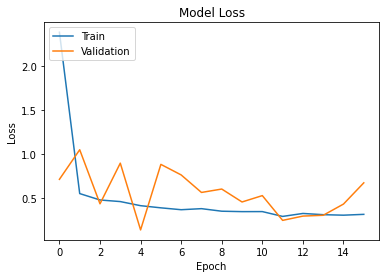

In [30]:
plt.plot(enet_classifier.history['loss'])
plt.plot(enet_classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

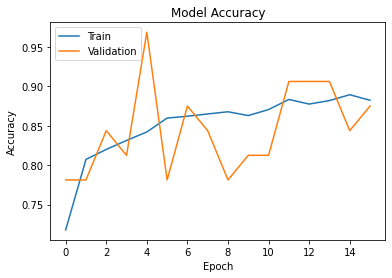

In [31]:
plt.plot(enet_classifier.history['accuracy'])
plt.plot(enet_classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
test_img = 'test_image.png'

In [33]:
test = cv2.imread(test_img)
test = cv2.resize(test, (50, 50))
test = np.array(test)
test = np.expand_dims(test, axis=0)
print("Shape of Validation Data: ", test.shape)
pred = model.predict(test)

Shape of Validation Data:  (1, 50, 50, 3)
1/1 [==============================] - 0s 310ms/step


In [34]:
def pred_img(index):
    if index == 0:
        return 'Biodegradable'
    elif index == 1:
        return 'Non-Biodegradable'
    elif index == 3:
        return 'Reduce/Reuse/Recycle-able'
    else:
        return 'Others'


op = []
pred = np.array(pred.tolist())[0]
index = pred.tolist().index(max(pred))
# print(index)
print("Input Test Image falls under the Category:", pred_img(index))
print("Accuracy = ", max(pred))

Input Test Image falls under the Category: Non-Biodegradable
Accuracy =  0.9990139007568359
